In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Phishing_Legitimate_full.csv")
data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [3]:
data.shape

(10000, 50)

In [4]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [5]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)


In [6]:
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
6411,6412,2,0,2,155,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,1,0
3374,3375,3,1,4,59,1,0,0,0,0,...,0,0,0,1,0,-1,1,-1,-1,1
1612,1613,2,0,3,57,0,0,0,0,0,...,1,0,0,1,0,-1,1,1,-1,1
7959,7960,1,0,3,66,4,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
274,275,1,0,3,26,0,0,0,0,0,...,0,0,0,1,1,1,1,1,-1,1


In [7]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

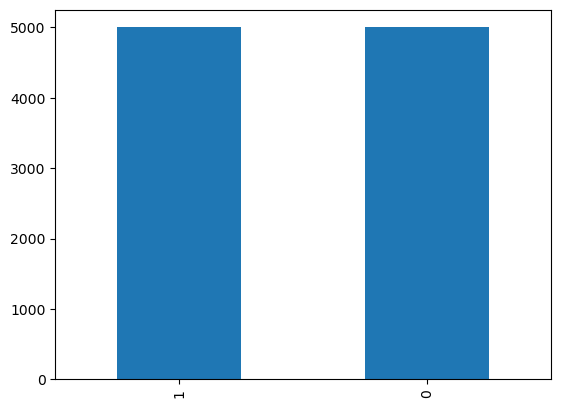

In [8]:
data['labels'].value_counts().plot(kind='bar')

In [9]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

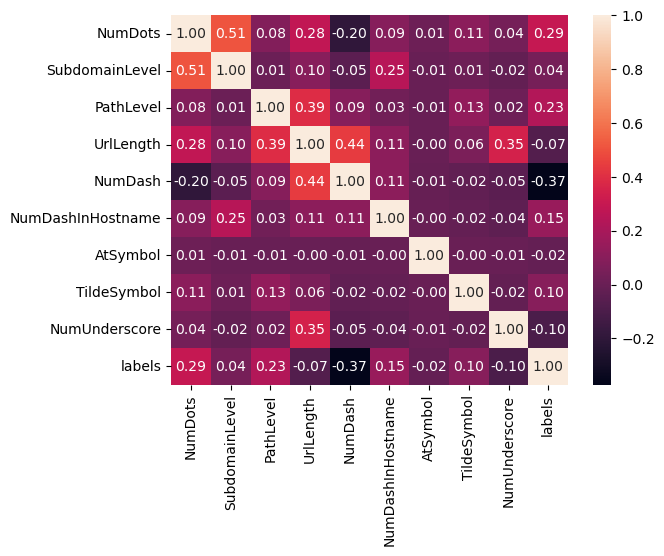

In [10]:
corr_heatmap(data, 0, 10)

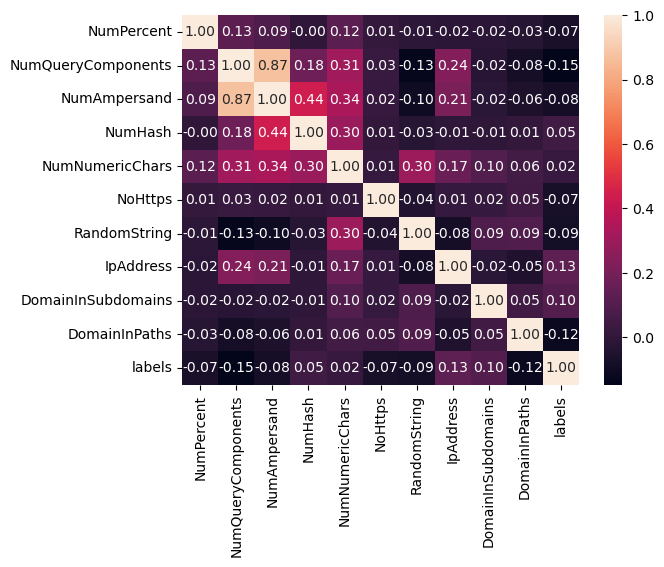

In [11]:
corr_heatmap(data, 10, 20)

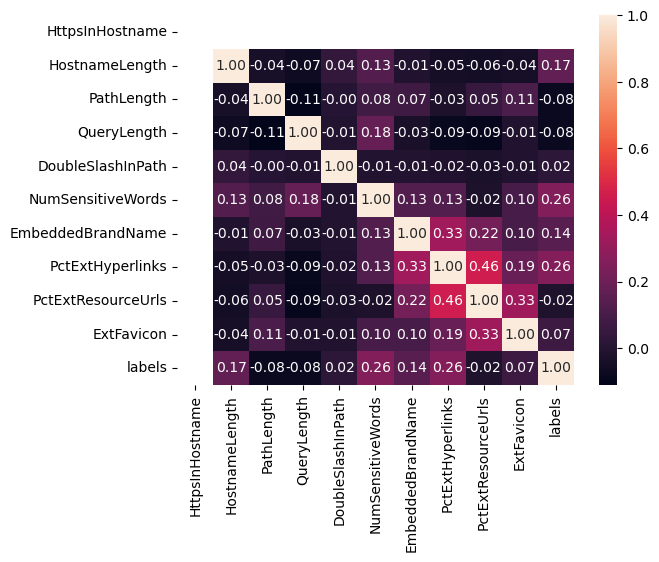

In [12]:
corr_heatmap(data, 20, 30)

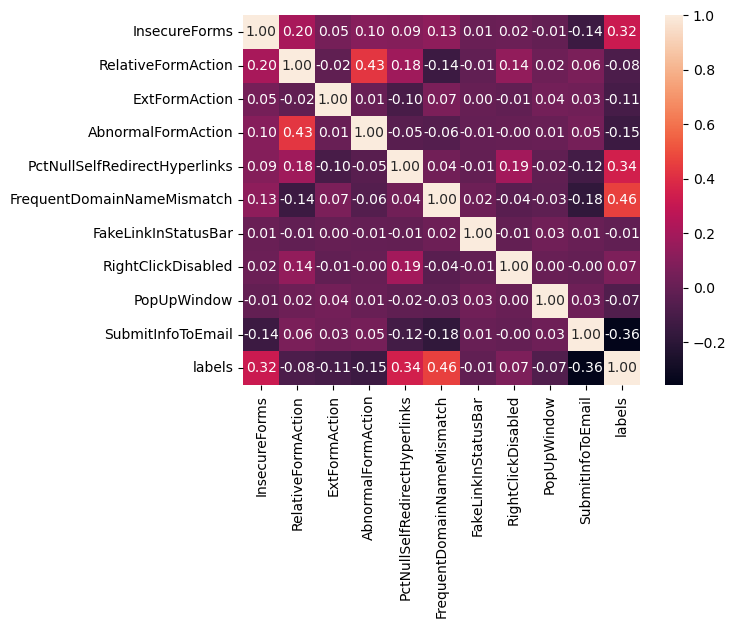

In [13]:
corr_heatmap(data, 30, 40)

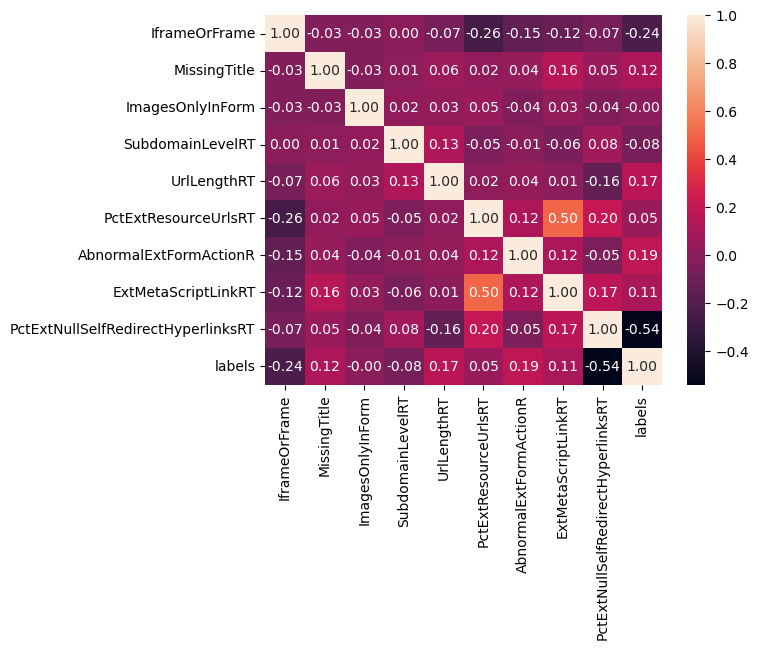

In [14]:
corr_heatmap(data, 40, 50)

In [15]:
from sklearn.feature_selection import mutual_info_classif

In [16]:
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']

In [17]:
discrete_features = X.dtypes == int

In [18]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores


PctExtHyperlinks                      4.670571e-01
PctExtResourceUrls                    2.934690e-01
PctNullSelfRedirectHyperlinks         2.385294e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

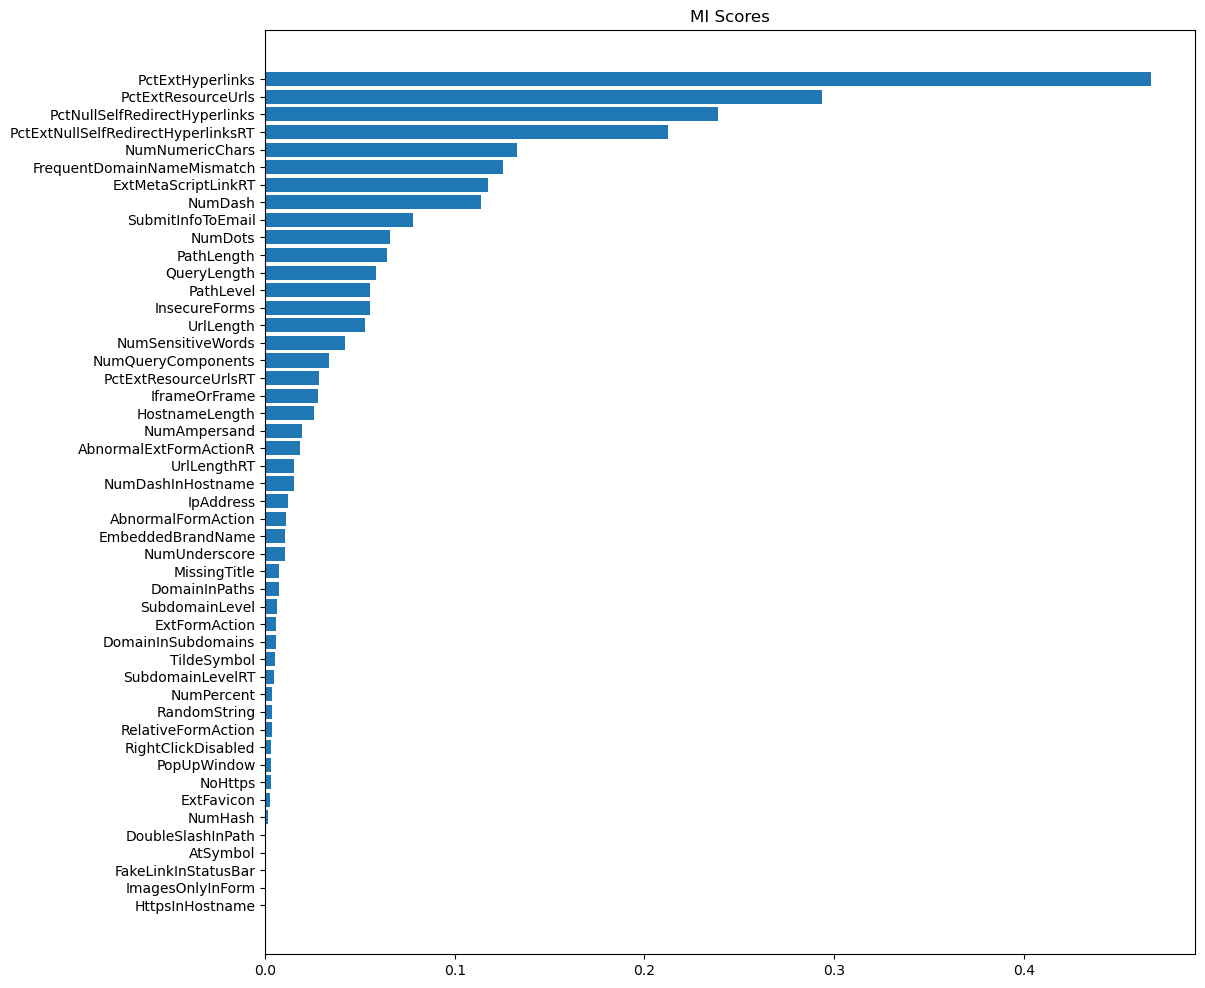

In [19]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [22]:
arr = []

for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])


Performance for Logistic Model with Top 20 features is precision : 0.9293532338308458, recall : 0.934934934934935, f1 score : 0.9321357285429143, accuracy : 0.932
Performance for Logistic Model with Top 21 features is precision : 0.9262536873156342, recall : 0.9382470119521913, f1 score : 0.9322117763483424, accuracy : 0.9315
Performance for Logistic Model with Top 22 features is precision : 0.9397590361445783, recall : 0.9332003988035892, f1 score : 0.9364682341170586, accuracy : 0.9365
Performance for Logistic Model with Top 23 features is precision : 0.9097963142580019, recall : 0.9408224674022067, f1 score : 0.9250493096646942, accuracy : 0.924
Performance for Logistic Model with Top 24 features is precision : 0.912573673870334, recall : 0.9421906693711968, f1 score : 0.9271457085828344, accuracy : 0.927
Performance for Logistic Model with Top 25 features is precision : 0.9224806201550387, recall : 0.9435084241823588, f1 score : 0.9328760411562959, accuracy : 0.9315
Performance for

In [23]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df


,num_of_features,precision,recall,f1_score,accuracy
0,20,0.929353,0.934935,0.932136,0.9320
1,21,0.926254,0.938247,0.932212,0.9315
2,22,0.939759,0.933200,0.936468,0.9365
3,23,0.909796,0.940822,0.925049,0.9240
4,24,0.912574,0.942191,0.927146,0.9270
5,25,0.922481,0.943508,0.932876,0.9315
6,26,0.918675,0.945248,0.931772,0.9330
7,27,0.919273,0.939175,0.929118,0.9305
8,28,0.931401,0.948819,0.940029,0.9385
9,29,0.924752,0.933067,0.928891,0.9285


In [24]:
x = data.iloc[:,1:-2]
y = data.iloc[:,-1]

In [25]:
x.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,-1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,0,0,1,-1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-1,1,-1
3,3,1,6,79,1,0,0,0,0,0,...,0,1,0,0,0,1,-1,1,1,1
4,3,0,4,46,0,0,0,0,0,0,...,0,0,1,0,0,1,1,-1,0,-1


In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: labels, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

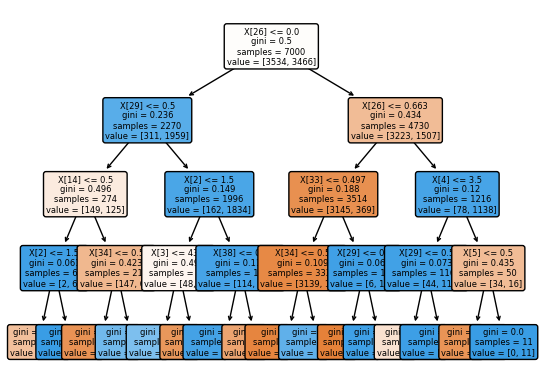

<Figure size 1000x1000 with 0 Axes>

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import sklearn


from sklearn import tree
clf=DecisionTreeClassifier(max_depth=4,random_state=0)
clf.fit(x_train,y_train)
tree.plot_tree(clf,fontsize=6,filled=True, 
              rounded=True)
plt.figure(figsize=(10,10))
plt.savefig('mov.png')


In [29]:
Y_pred = clf.predict(x_test)  
score = clf.score(x_test, y_test)  
print(score)  

0.955


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
x = data.iloc[:,1:-2]
y = data.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred  =  classifier.predict(X_test)

In [36]:
y_pred 

array([0, 1, 1, ..., 0, 1, 0])

In [37]:
y_test

9394    0
898     1
2398    1
5906    0
2343    1
       ..
1037    1
2899    1
9549    0
2740    1
6690    0
Name: labels, Length: 2000, dtype: int32

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)
print(cm)

0.8475
[[965  47]
 [258 730]]
